ASSIGNMENT 2 - APPLE SUPPORT SNA DIAGRAM

In [2]:
import tweepy
from tweepy import OAuthHandler
import json
import csv
from tweepy import Cursor
import pandas as pd
import datetime
from datetime import timedelta
import time
import csv
import networkx as nx
from operator import itemgetter
import community #This is the python-louvain package we installed.
import matplotlib.pyplot as plt

In [3]:
# load/read from file using JSON
secrets = json.loads(open("secrets_Apple.json","r").read())

api_key = secrets['CONSUMER_KEY']
api_key_secret = secrets['CONSUMER_SECRET']
access_key = secrets['ACCESS_TOKEN_KEY']
access_key_secret = secrets['ACCESS_TOKEN_SECRET']


auth = OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_key, access_key_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

#change per brand
screen_name = "AppleSupport"


In [4]:

def getFriendFollowerConnection(screen_name):
    
    def checkPause(calls):
        if calls%30==0:
            print("Sleep for 15 minutes")
            time.sleep(60*15)
            
    userCount=0
    calls=0
    maxEntries=5
    data=[]
    nodes=[]
    
    print("##### First Layer #####")
    nodes.append(screen_name)
    friends=api.friends_ids(screen_name,count=maxEntries)
    for friend in friends:
        data.append([screen_name,str(friend)])
        nodes.append(str(friend))
        userCount+=1
    print("Total {}'s Friends: ".format(screen_name),userCount)
    calls+=1
    print("Number of calls: ",calls)
    checkPause(calls)
    
    followers=api.followers_ids(screen_name,count=maxEntries)
    for follower in followers:
        data.append([screen_name,str(follower)])
        nodes.append(str(follower))
        userCount+=1
        
    print("Total {}'s Friends and Followers: ".format(screen_name),userCount)
    calls+=1
    print("Number of calls: ",calls)
    checkPause(calls)
    
    #next level 
    print("##### Second Layer #####")
    for entry in data:
        if entry[0]==screen_name:
            try:
                friends=api.friends_ids(entry[1],count=maxEntries)
                for friend in friends:
                    data.append([entry[1],str(friend)])
                    nodes.append(str(friend))
                    userCount+=1
                calls+=1
                print("Number of calls: ",calls)
                checkPause(calls)
            except tweepy.TweepError as e:
                print(e,"Error Encountered, Skipping user...")
                calls+=1
                print("Number of calls: ",calls)
                checkPause(calls)
                pass
            
            try:
                followers=api.followers_ids(entry[1],count=maxEntries)
                for follower in followers:
                    data.append([entry[1],str(follower)])
                    nodes.append(str(follower))
                    userCount+=1
                calls+=1
                print("Number of calls: ",calls)
                checkPause(calls)
            except tweepy.TweepError as e:
                print(e,"Error Encountered, Skipping user...")
                calls+=1
                print("Number of calls: ",calls)
                checkPause(calls)
                pass

            print("Current User Count: ",userCount)
        else:
            break
   
    print("Final User Count: ",userCount)  
    df=pd.DataFrame(data)
    df.to_csv("{}_edgesList_5.csv".format(screen_name),header=['Source','Target'],index=False)

    df2=pd.DataFrame(nodes)
    df2.to_csv("{}_nodesList_5.csv".format(screen_name),header=['Individuals'],index=False)
    
getFriendFollowerConnection(screen_name)

##### First Layer #####
Total AppleSupport's Friends:  5
Number of calls:  1
Total AppleSupport's Friends and Followers:  10
Number of calls:  2
##### Second Layer #####
Number of calls:  3
Number of calls:  4
Current User Count:  20
Number of calls:  5
Number of calls:  6
Current User Count:  30
Number of calls:  7
Number of calls:  8
Current User Count:  40
Number of calls:  9
Number of calls:  10
Current User Count:  47
Number of calls:  11
Number of calls:  12
Current User Count:  52
Not authorized. Error Encountered, Skipping user...
Number of calls:  13
Not authorized. Error Encountered, Skipping user...
Number of calls:  14
Current User Count:  52
Number of calls:  15
Number of calls:  16
Current User Count:  57
Number of calls:  17
Number of calls:  18
Current User Count:  67
Number of calls:  19
Number of calls:  20
Current User Count:  77
Number of calls:  21
Number of calls:  22
Current User Count:  82
Final User Count:  82


In [5]:
import csv
with open('AppleSupport_nodesList_5.csv') as fr:
  noderead = csv.reader(fr)
  nodes= [n for n in noderead][1:]
for n in nodes:
  print(n)
node_name = [n[0] for n in nodes] 
print(node_name)

['AppleSupport']
['27529216']
['432943643']
['1182675871']
['1091131241510821889']
['1119335863610036224']
['256326442']
['327997037']
['1368470919505666050']
['1357029267499077633']
['1369928128735313925']
['34380243']
['195396716']
['1248996730940448774']
['61226587']
['1057676041811099648']
['145727918']
['34380243']
['1254784171358056449']
['1140777686']
['1029479948']
['735394065861226496']
['2955596087']
['101822770']
['1131613285252419584']
['40156330']
['4402434081']
['145727918']
['55526759']
['200077855']
['3171574092']
['53832029']
['148529707']
['23245909']
['932085767131758592']
['295652956']
['145727918']
['1091351572460777473']
['1369872278268354561']
['1341549171262726144']
['197403649']
['357916689']
['82652901']
['425079807']
['225736850']
['145727918']
['520920448']
['1283594005473906689']
['145727918']
['1369896586252275714']
['30879764']
['1369880599213731842']
['75646362']
['428333']
['17000457']
['1367531']
['74286565']
['3309375033']
['1636590253']
['3257608936'

In [6]:
with open('AppleSupport_edgesList_5.csv') as fr:
  edgeread = csv.reader(fr)
  edges= [n for n in edgeread][1:]
for e in edges:
  print(e)


['AppleSupport', '27529216']
['AppleSupport', '432943643']
['AppleSupport', '1182675871']
['AppleSupport', '1091131241510821889']
['AppleSupport', '1119335863610036224']
['AppleSupport', '256326442']
['AppleSupport', '327997037']
['AppleSupport', '1368470919505666050']
['AppleSupport', '1357029267499077633']
['AppleSupport', '1369928128735313925']
['27529216', '34380243']
['27529216', '195396716']
['27529216', '1248996730940448774']
['27529216', '61226587']
['27529216', '1057676041811099648']
['27529216', '145727918']
['27529216', '34380243']
['27529216', '1254784171358056449']
['27529216', '1140777686']
['27529216', '1029479948']
['432943643', '735394065861226496']
['432943643', '2955596087']
['432943643', '101822770']
['432943643', '1131613285252419584']
['432943643', '40156330']
['432943643', '4402434081']
['432943643', '145727918']
['432943643', '55526759']
['432943643', '200077855']
['432943643', '3171574092']
['1182675871', '53832029']
['1182675871', '148529707']
['1182675871', '

In [7]:
#create graph object
G = nx.Graph()

#add lists of nodes and edges 
G.add_nodes_from(node_name)
G.add_edges_from(edges)

print(G.number_of_nodes())
print(G.number_of_edges())
print(nx.info(G))

75
80
Name: 
Type: Graph
Number of nodes: 75
Number of edges: 80
Average degree:   2.1333


In [8]:
G = nx.Graph() 
G.add_nodes_from(node_name)
G.add_edges_from(edges)
print("Node degree of AppleSupport:", G.degree('AppleSupport'))

print("Calculating k = 15")
bet_dict = nx.betweenness_centrality(G, k=15)
nx.set_node_attributes(G, name='betweenness15', values=bet_dict)

print("Calculating k = 20")
bet_dict = nx.betweenness_centrality(G, k=20)
nx.set_node_attributes(G, name='betweenness20', values=bet_dict)

print("Calculating k = 25")
bet_dict = nx.betweenness_centrality(G, k=25)
nx.set_node_attributes(G, name='betweenness25', values=bet_dict)

print("Calculating eigenvector")
eig_dict = nx.eigenvector_centrality(G, max_iter=600)
nx.set_node_attributes(G, name='eigenvector', values=eig_dict)
print(G.nodes['AppleSupport'])

Node degree of AppleSupport: 10
Calculating k = 15
Calculating k = 20
Calculating k = 25
Calculating eigenvector
{'betweenness15': 0.7113106256941873, 'betweenness20': 0.7497223250647909, 'betweenness25': 0.7405590522028879, 'eigenvector': 0.4721450041129757}


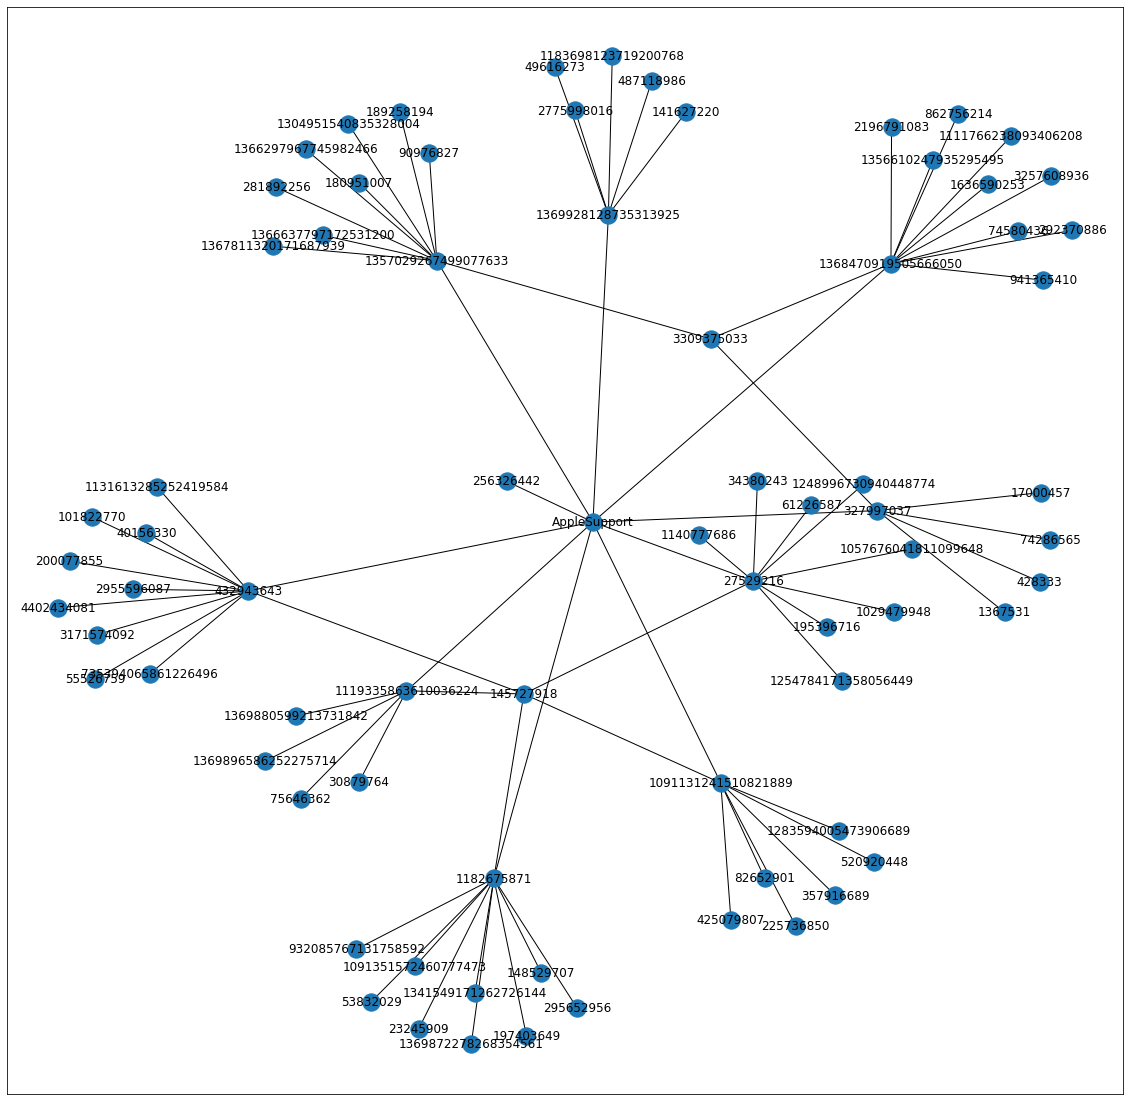

In [9]:
import matplotlib.pyplot as plt

part = community.best_partition(G)

plt.figure(figsize=(20,20))
# nx.draw_networkx(G,pos=nx.circular_layout(G))
nx.draw_networkx(G,pos=nx.spring_layout(G))
plt.show()

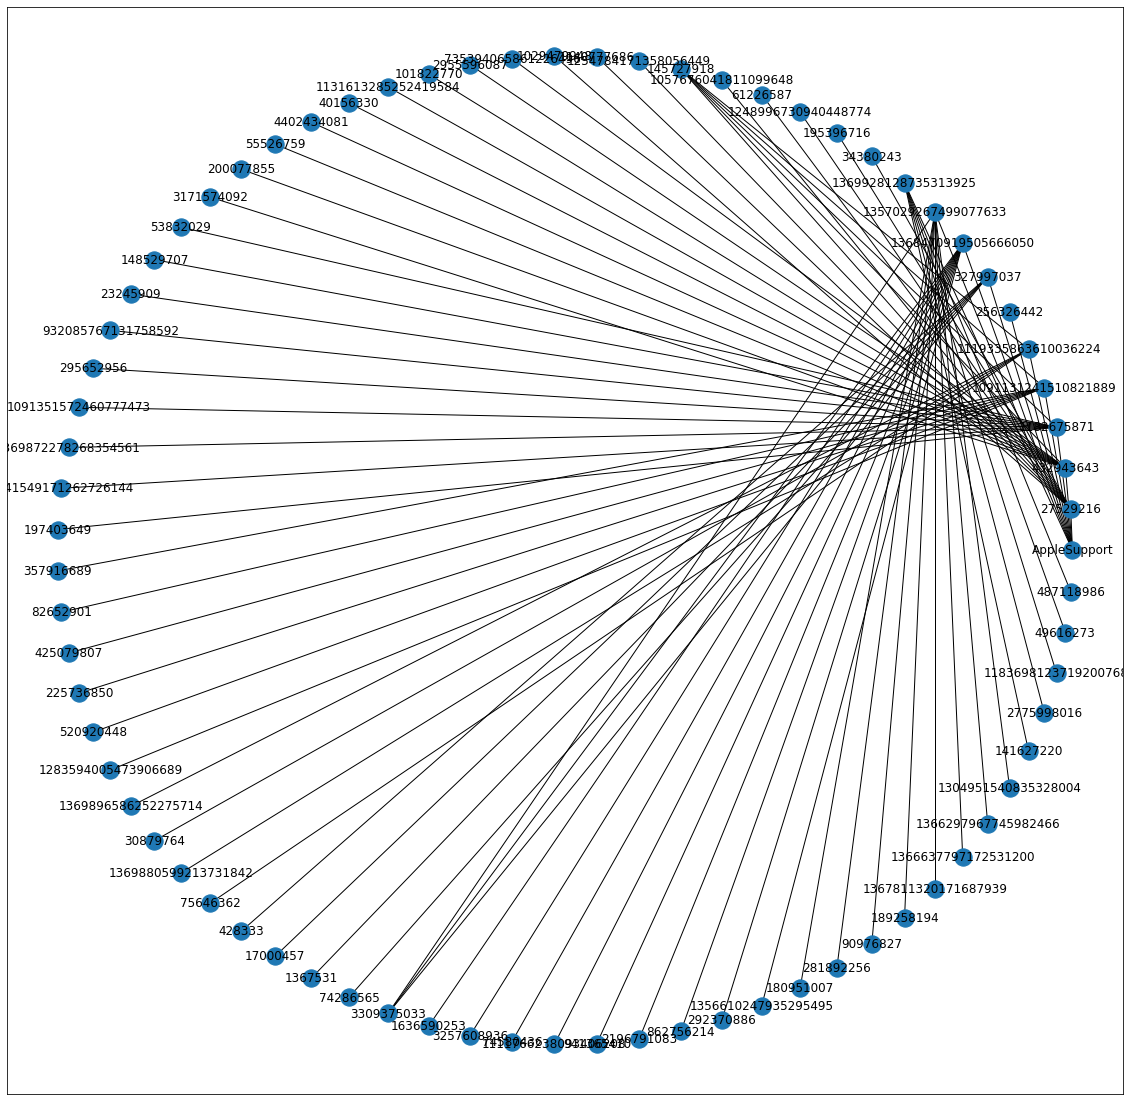

In [10]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G,pos=nx.circular_layout(G))
plt.show()

In [11]:
print(part)

{'AppleSupport': 0, '27529216': 1, '432943643': 2, '1182675871': 3, '1091131241510821889': 4, '1119335863610036224': 5, '256326442': 0, '327997037': 6, '1368470919505666050': 7, '1357029267499077633': 8, '1369928128735313925': 0, '34380243': 1, '195396716': 1, '1248996730940448774': 1, '61226587': 1, '1057676041811099648': 1, '145727918': 5, '1254784171358056449': 1, '1140777686': 1, '1029479948': 1, '735394065861226496': 2, '2955596087': 2, '101822770': 2, '1131613285252419584': 2, '40156330': 2, '4402434081': 2, '55526759': 2, '200077855': 2, '3171574092': 2, '53832029': 3, '148529707': 3, '23245909': 3, '932085767131758592': 3, '295652956': 3, '1091351572460777473': 3, '1369872278268354561': 3, '1341549171262726144': 3, '197403649': 3, '357916689': 4, '82652901': 4, '425079807': 4, '225736850': 4, '520920448': 4, '1283594005473906689': 4, '1369896586252275714': 5, '30879764': 5, '1369880599213731842': 5, '75646362': 5, '428333': 6, '17000457': 6, '1367531': 6, '74286565': 6, '330937

In [12]:
nx.set_node_attributes(G, values = part, name = "modularity")

In [13]:
modularity = {} # Create a new, empty dictionary
for k,v in part.items(): # Loop through the community dictionary
    if v not in modularity:
        modularity[v] = [k] # Add a new key for a modularity class the code hasn't seen before
    else:
        modularity[v].append(k) # Append a name to the list for a modularity class the code has already seen

for k,v in modularity.items(): # Loop through the new dictionary
    #if len(v) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(k)+':', v) # Print out the classes and their members

Class 0: ['AppleSupport', '256326442', '1369928128735313925', '141627220', '2775998016', '1183698123719200768', '49616273', '487118986']
Class 1: ['27529216', '34380243', '195396716', '1248996730940448774', '61226587', '1057676041811099648', '1254784171358056449', '1140777686', '1029479948']
Class 2: ['432943643', '735394065861226496', '2955596087', '101822770', '1131613285252419584', '40156330', '4402434081', '55526759', '200077855', '3171574092']
Class 3: ['1182675871', '53832029', '148529707', '23245909', '932085767131758592', '295652956', '1091351572460777473', '1369872278268354561', '1341549171262726144', '197403649']
Class 4: ['1091131241510821889', '357916689', '82652901', '425079807', '225736850', '520920448', '1283594005473906689']
Class 5: ['1119335863610036224', '145727918', '1369896586252275714', '30879764', '1369880599213731842', '75646362']
Class 6: ['327997037', '428333', '17000457', '1367531', '74286565', '3309375033']
Class 7: ['1368470919505666050', '1636590253', '325